In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT

#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

First lets start with q0 = q1 = 0, state -----|00> 

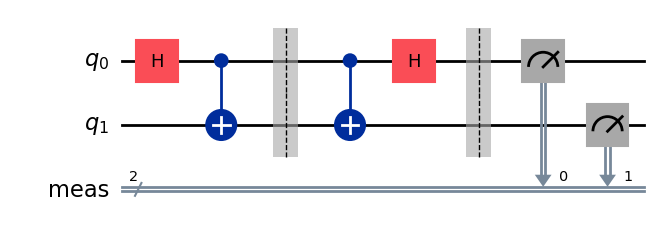

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(2)   #N = 2 qubit. N=2 classical bits


############Defining the circuit with q0 = q1 = 0

qc.h(0) #put q0 on superposition

qc.cx(0,1) #Apply CNOT

qc.barrier()

qc.cx(0,1) #Apply another CNOT

qc.h(0)  #take out q0 from superposition

qc.measure_all() #Messure the qubits

qc.draw("mpl")

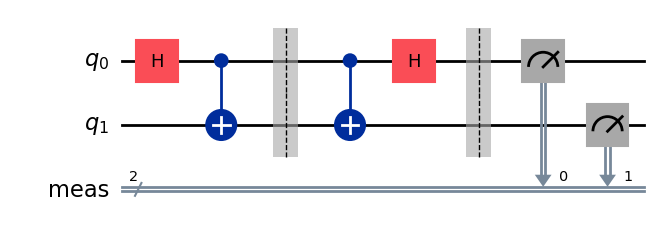

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)

RESULT  {'00': 1000}


circuit starting with |00>
-------------



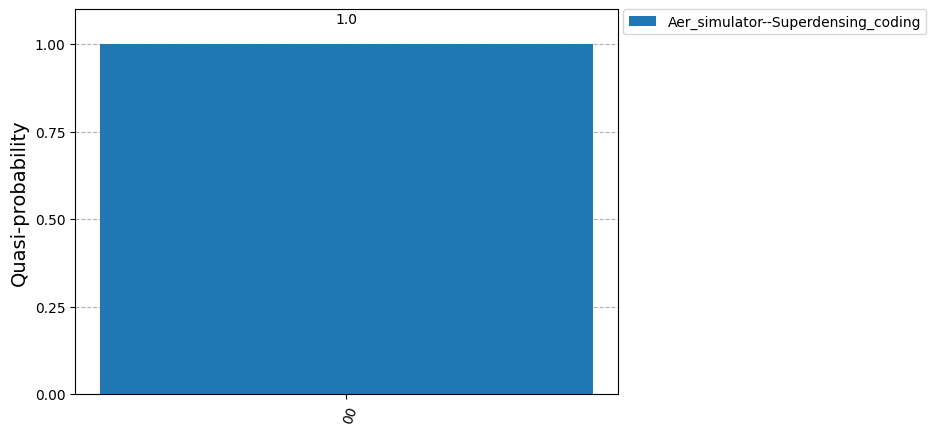

In [6]:
print('circuit starting with |00>')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Superdensing_coding'])

Since CNOT is unitary the results does not changes

In [7]:
############FIM###################

Now q0 = |1>, q1 = |0>, state --- |01>

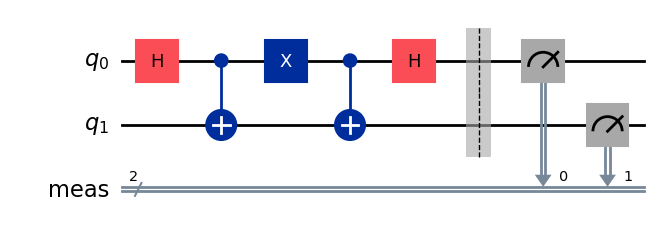

In [8]:
#Restartting the circuit

qc = QuantumCircuit(2)# N= 2 qubits. N= 2 classical bits

############Defining the circuit to q0 = 1, q1 = 0

qc.h(0) #put q0 on superposition

qc.cx(0,1) #Apply CNOT

qc.x(0) #flipping q0

qc.cx(0,1) #Apply another CNOT

qc.h(0)  #taking out q0 from superposition

qc.measure_all() #Measure the qubits

qc.draw("mpl")

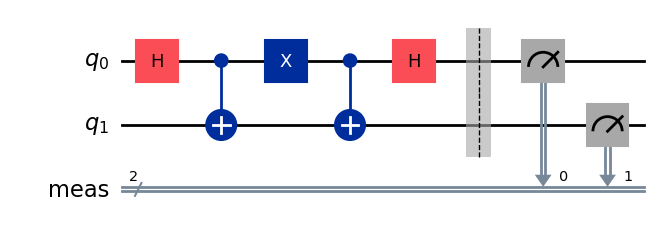

In [9]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


In [10]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)


RESULT  {'10': 1000}


circuit starting with |01>
-------------



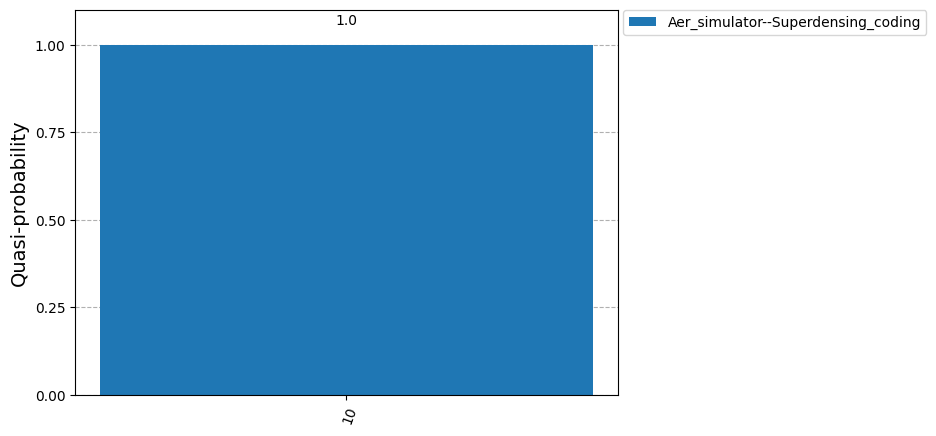

In [11]:
print('circuit starting with |01>')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Superdensing_coding'])

In [12]:
############FIM###################

Now q0 = |0>, q1 = |1>, state --- |10>

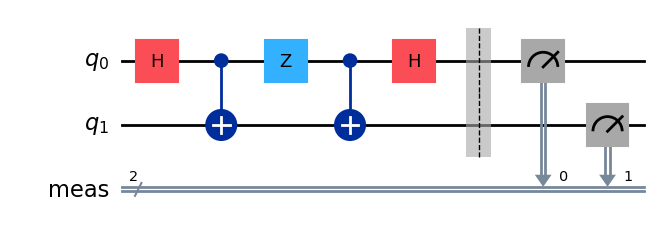

In [13]:
#Restartting the circuit

qc = QuantumCircuit(2)# N= 2 qubits. N= 2 classical bits

############Defining the circuit to q0 = 0, q1 = 1

qc.h(0) #put q0 on superposition

qc.cx(0,1) #Apply CNOT

qc.z(0) #flipping q0 only when q0 = |1>

qc.cx(0,1) #Apply another CNOT

qc.h(0)  #taking out q0 from superposition

qc.measure_all() #Measure the qubits

qc.draw("mpl")


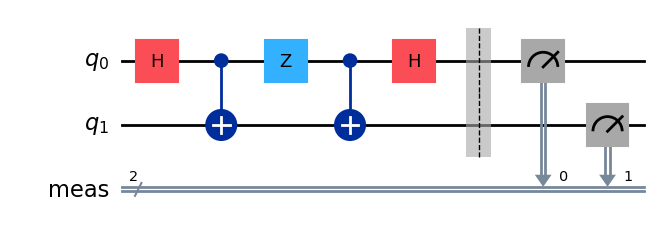

In [14]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


In [15]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)


RESULT  {'01': 1000}


circuit starting with |10>
-------------



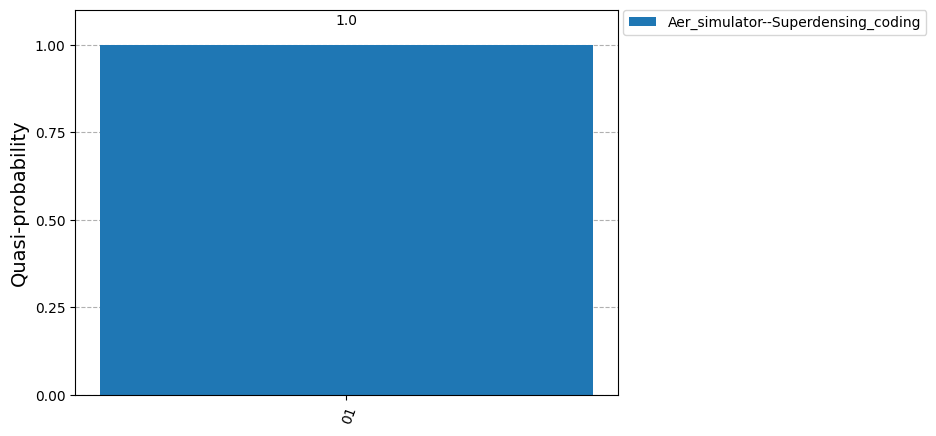

In [16]:
print('circuit starting with |10>')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Superdensing_coding'])

In [17]:
############FIM###################

Now q0 = |1>, q1 = |1>, state --- |11>

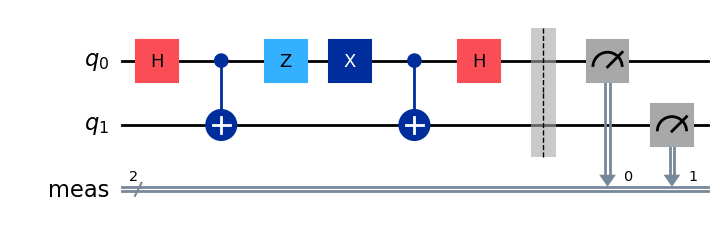

In [18]:
#Restartting the circuit

qc = QuantumCircuit(2)# N= 2 qubits. N= 2 classical bits

############Defining the circuit to q0 = 1, q1 = 1

qc.h(0) #put q0 on superposition

qc.cx(0,1) #Apply CNOT

qc.z(0) #flipping q0 only when q0 = |1>

qc.x(0)#flipping q0

qc.cx(0,1) #Apply another CNOT

qc.h(0)  #taking out q0 from superposition

qc.measure_all() #Measure the qubits

qc.draw("mpl")

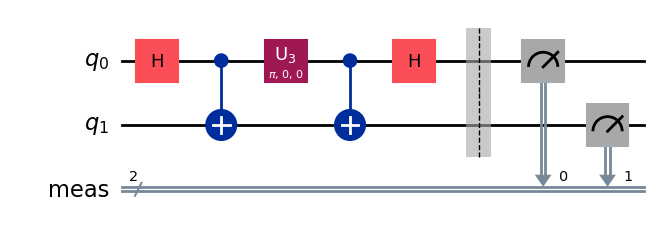

In [19]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


circuit starting with |11>
-------------



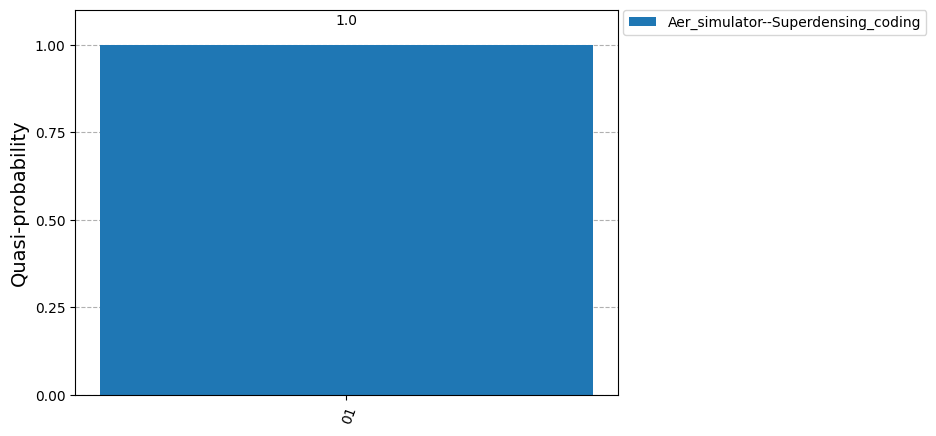

In [20]:
print('circuit starting with |11>')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--Superdensing_coding'])
